In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import sys
sys.path.append("../_titanic")
import preprocessing
import modelisation


# Preprocessing

In [2]:
train = pd.read_csv('../_data/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


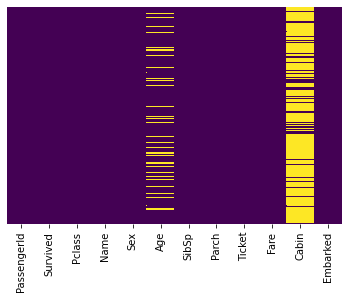

In [5]:
preprocessing.draw_heatmap(train)

In [6]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [7]:
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [8]:
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train=preprocessing.input_missing_values(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


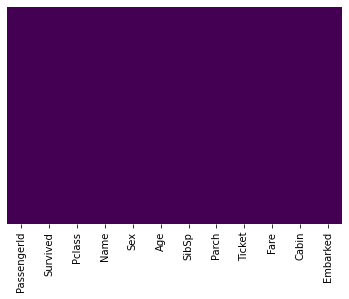

In [11]:
preprocessing.draw_heatmap(train)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
survived=train[train.Survived==1]
print(len(survived))

dead=train[train.Survived==0]
print(len(dead))


342
549


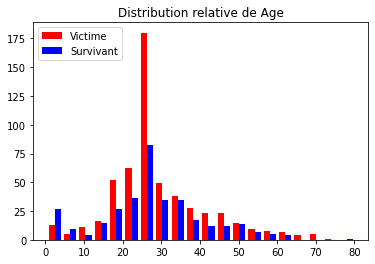

In [14]:
preprocessing.plot_hist(survived, dead, 'Age')

# Modelisation

In [15]:
model_cols1=['SibSp','Parch','Fare']
X,y=preprocessing.parse_model(X=train.copy(),use_columns=model_cols1)

In [16]:
modelisation.Logistic_Regression_Model(X,y,0.3,42)["score_test"]

0.664179104477612

In [17]:
modelisation.Random_Forest_Model(X,y,0.3,42)["score_test"]

0.6529850746268657

In [18]:
modelisation.GridSearchCV_Model(X,y,0.3,42)["score_test"]

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.3min finished


0.6977611940298507

In [21]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [22]:
model_cols2=['SibSp','Parch','Fare','Pclass']
X,y=preprocessing.parse_model(X=train.copy(),use_columns=model_cols2)
X.head()

,SibSp,Parch,Fare,Pclass
0,1,0,7.2500,3
1,1,0,71.2833,1
2,0,0,7.9250,3
3,1,0,53.1000,1
4,0,0,8.0500,3


In [23]:
cols=['Pclass']
X=preprocessing.dummify(X,cols)
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1


In [24]:
modelisation.Logistic_Regression_Model(X,y,0.3,42)["score_test"]

0.7276119402985075

In [25]:
modelisation.Random_Forest_Model(X,y,0.3,42)["score_test"]

0.6791044776119403

In [26]:
modelisation.GridSearchCV_Model(X,y,0.3,42)["score_test"]

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.0min finished


0.7313432835820896

In [27]:
model_cols3=['SibSp','Parch','Fare',"Pclass","Sex","Age","Name"]
X,y=preprocessing.parse_model(X=train.copy(),use_columns=model_cols3)
X.head()

,SibSp,Parch,Fare,Pclass,Sex,Age,Name
0,1,0,7.2500,3,male,22.0,"Braund, Mr. Owen Harris"
1,1,0,71.2833,1,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,0,0,7.9250,3,female,26.0,"Heikkinen, Miss. Laina"
3,1,0,53.1000,1,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0,8.0500,3,male,35.0,"Allen, Mr. William Henry"


In [28]:
columns_to_dummify=["Pclass","Sex","title","Surname"]
X=preprocessing.transform_df(X,columns_to_dummify)
X.head()

,SibSp,Parch,Fare,is_child,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,title_Capt,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,Surname_False,Surname_True
0,1,0,7.2500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,71.2833,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,7.9250,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,53.1000,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,8.0500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [29]:
modelisation.Logistic_Regression_Model(X,y,0.3,42)["score_test"]

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.832089552238806

In [30]:
modelisation.Random_Forest_Model(X,y,0.3,42)["score_test"]

0.8134328358208955

In [31]:
modelisation.GridSearchCV_Model(X,y,0.3,42)["score_test"]

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.8min finished


0.8208955223880597

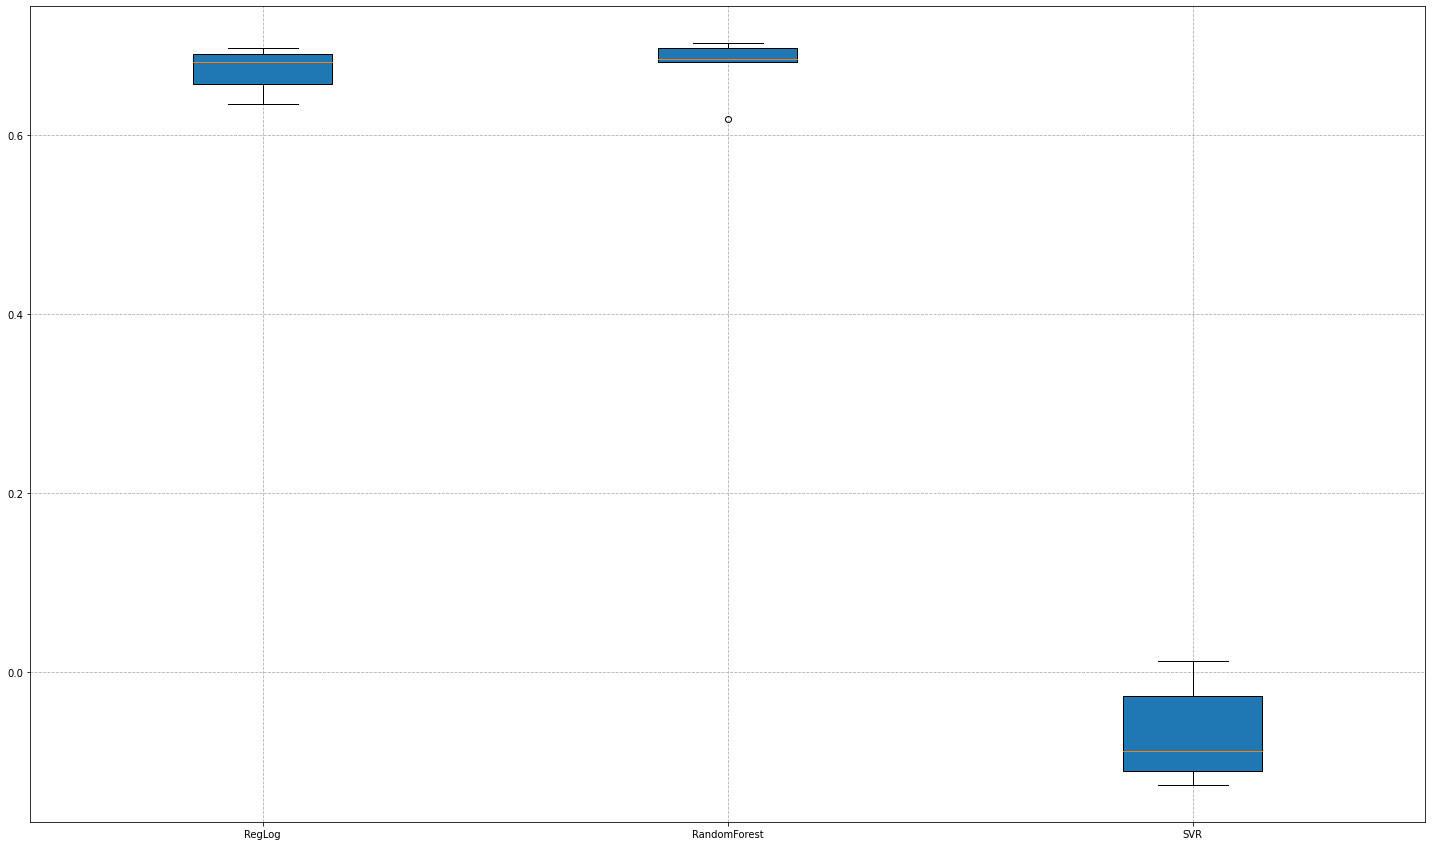

In [32]:
from sklearn.svm import SVR
kf = KFold(n_splits=5)

model_cols1=['SibSp','Parch','Fare']
X,y=preprocessing.parse_model(X=train.copy(),use_columns=model_cols1)

model1 = []
model2 = []
model3 = []

model=LogisticRegression(random_state=42)
kf=KFold(n_splits=5,shuffle=True)
model1=cross_val_score(model,X,y,cv=kf,n_jobs=1)

    
model=RandomForestClassifier(random_state=42,n_estimators=100,criterion="gini",max_depth=20)
kf=KFold(n_splits=5,shuffle=True)
model2=cross_val_score(model,X,y,cv=kf,n_jobs=1)

model=SVR()
kf=KFold(n_splits=5,shuffle=True)
model3=cross_val_score(model,X,y,cv=kf,n_jobs=1)


tmp = [model1, model2, model3]
labels = ["RegLog", "RandomForest","SVR"]
figure = plt.figure(figsize=(25,15))
boxlook = plt.boxplot(tmp,labels=labels,patch_artist=True)
plt.grid(linestyle='--')